<a href="https://colab.research.google.com/github/linked0/deep-learning/blob/master/AAMY/Sentiment_Classification_Solutions_my.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Classification & How To "Frame Problems" for a Neural Network

### What You Should Already Know
* neural networks, forward and back-propagation
* stochastic gradient descent
* mean squared error
* and train/test spits

### Where to Get Help if You Need It
* Re-watch previous Udacity Lectures
* Levderage the recommended Course Reading Materail - Grokking Deep Learning
* Shoot me a tweet @iamtrask

### Tutorial Outline:
* Intro: The Importance of "Framing a Problem" (this lesson)
....


# 준비

In [1]:
!apt-get install -y -qq software-properties-common module-init-tools > /dev/null
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse > /dev/nul

from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

!mkdir -p drive
!google-drive-ocamlfuse drive


^C


KeyboardInterrupt: ignored

In [2]:
###### git partially cloning
repo='deep-learning'
sub_dir='sentiment-network'
url='https://github.com/linked0/' + repo + '.git'
!mkdir $repo
%cd $repo
!git init
!git remote add -f origin $url
!git config core.sparsecheckout true
!echo $sub_dir >> .git/info/sparse-checkout
!git pull --recurse-submodules origin master
%cd $sub_dir
!ls

/content/deep-learning
Initialized empty Git repository in /content/deep-learning/.git/
Updating origin
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 1423 (delta 73), reused 19 (delta 11), pack-reused 1307
Receiving objects: 100% (1423/1423), 127.61 MiB | 31.56 MiB/s, done.
Resolving deltas: 100% (447/447), done.
From https://github.com/linked0/deep-learning
 * [new branch]      master     -> origin/master
From https://github.com/linked0/deep-learning
 * branch            master     -> FETCH_HEAD
/content/deep-learning/sentiment-network
labels.txt				     sentiment_network_2.png
requirements.txt			     sentiment_network.png
reviews.txt				     sentiment_network_pos.png
Sentiment_Classification_Projects.ipynb      sentiment_network_sparse_2.png
Sentiment_Classification_Solutions.ipynb     sentiment_network_sparse.png
Sentiment_Classification_Solutions_my.ipynb


In [0]:
from google.colab import files
files.download("reviews.txt")
 

# Lesson: Curate a Dataset

In [0]:
def pretty_print_review_and_label(i):
  print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt', 'r') # What we know!
reviews = list(map(lambda x:x[:-1], g.readlines()))
g.close()

g = open('labels.txt', 'r')
labels = list(map(lambda x:x[:-1].upper(), g.readlines()))
g.close()

In [4]:
len(reviews)

25000

In [5]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [6]:
labels[0]

'POSITIVE'

# Lesson: Develop a Predictive Theory


In [7]:
print('labels.txt \t : \t reviews.txt\n')
pretty_print_review_and_label(2137)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...


# Project 1: Quick Theory Validation
There are multiple ways to implement these projects, but in order to get your code closer to what Andrew shows in his solutions, we've provided some hhints and starter code thhroughout this notebook


In [0]:
from collections import Counter
import numpy as np

We'll create these `Counter` objects, one for words from positive reviews, one for words from negative reviews, and one for all the words

In [0]:
# Create these Counter objects to store positive, negative and total counts
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()


**TODO**: Examine all these reviews. For each word in positive review, increase the count for that word in both your positive counter and total words counter; likewise, for each word in a negative review, increase the count for that word in both your negative counter and the total words counter.
**Note**: Throughout these projects, you should use split(' ') to divide a piece of text(such as a review) into individual words. If you use split() instead, you'll get slightly different results than what the videos and solutions show.

In [0]:
# Loop over all the words in all the reviews and increment the counts in the appropriate counter objects
for i in range(len(reviews)):
  if(labels[i] == 'POSITIVE'):
    for word in reviews[i].split(' '):
      positive_counts[word] += 1
      total_counts[word] += 1
  else:
    for word in reviews[i].split(' '):
      negative_counts[word] += 1
      total_counts[word] += 1
      

Run the following two cells to list the words used in positive reviews and negative reviews, respectively, ordered from most to least commonly used..

In [11]:
positive_counts.most_common()

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822),
 ('movie', 19074),
 ('his', 17227),
 ('on', 17008),
 ('you', 16681),
 ('he', 16282),
 ('are', 14807),
 ('not', 14272),
 ('t', 13720),
 ('one', 13655),
 ('have', 12587),
 ('be', 12416),
 ('by', 11997),
 ('all', 11942),
 ('who', 11464),
 ('an', 11294),
 ('at', 11234),
 ('from', 10767),
 ('her', 10474),
 ('they', 9895),
 ('has', 9186),
 ('so', 9154),
 ('like', 9038),
 ('about', 8313),
 ('very', 8305),
 ('out', 8134),
 ('there', 8057),
 ('she', 7779),
 ('what', 7737),
 ('or', 7732),
 ('good', 7720),
 ('more', 7521),
 ('when', 7456),
 ('some', 7441),
 ('if', 7285),
 ('just', 7152),
 ('can', 7001),
 ('story', 6780),
 ('time', 6515),
 ('my', 6488),
 ('g

In [12]:
# Examine the counts of the most common words in negative reviews
negative_counts.most_common()

[('', 561462),
 ('.', 167538),
 ('the', 163389),
 ('a', 79321),
 ('and', 74385),
 ('of', 69009),
 ('to', 68974),
 ('br', 52637),
 ('is', 50083),
 ('it', 48327),
 ('i', 46880),
 ('in', 43753),
 ('this', 40920),
 ('that', 37615),
 ('s', 31546),
 ('was', 26291),
 ('movie', 24965),
 ('for', 21927),
 ('but', 21781),
 ('with', 20878),
 ('as', 20625),
 ('t', 20361),
 ('film', 19218),
 ('you', 17549),
 ('on', 17192),
 ('not', 16354),
 ('have', 15144),
 ('are', 14623),
 ('be', 14541),
 ('he', 13856),
 ('one', 13134),
 ('they', 13011),
 ('at', 12279),
 ('his', 12147),
 ('all', 12036),
 ('so', 11463),
 ('like', 11238),
 ('there', 10775),
 ('just', 10619),
 ('by', 10549),
 ('or', 10272),
 ('an', 10266),
 ('who', 9969),
 ('from', 9731),
 ('if', 9518),
 ('about', 9061),
 ('out', 8979),
 ('what', 8422),
 ('some', 8306),
 ('no', 8143),
 ('her', 7947),
 ('even', 7687),
 ('can', 7653),
 ('has', 7604),
 ('good', 7423),
 ('bad', 7401),
 ('would', 7036),
 ('up', 6970),
 ('only', 6781),
 ('more', 6730),
 ('

As you can see, common words like "the" appear very often in both positive and negative reviews. Instead of finding the most common words in positive or negative reviews, what you really want are thhe words found in positive reviews more often than in negative reviews, and vice versa. To accomplish this, you'lll need to calcuate the ratios of word usage between positive and negative reviews

**TODO**: Check all the words you've seen and calculate the ratio of positive to negative uses and store that ratio in pos_neg_ratios

In [0]:
pos_neg_ratios = Counter()

# Calculate the ratios of positive and negative uses of the most common words
# Consider words to be "common" if they've been used at least 100 times
for term, cnt in list(total_counts.most_common()):
  if (cnt>100):
    pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
    pos_neg_ratios[term] = pos_neg_ratio

Examin the ratios you've calculated for a few words:


In [14]:
print('Pos-to-neg ratio for "the" = {}'.format(pos_neg_ratios['the']))
print('Pos-to-neg ratio for "amazing" = {}'.format(pos_neg_ratios['amazing']))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios['terrible']))

Pos-to-neg ratio for "the" = 1.0607993145235326
Pos-to-neg ratio for "amazing" = 4.022813688212928
Pos-to-neg ratio for 'terrible' = 0.17744252873563218


Looking closely at the values you just calculated, we see the following:
* Words that you would expect to see more often in positive reviews -- like 'amazong' --- have a ration greater than 1. The more skewed a word is toward positive, the farther from 1 its positive-to-negative ratio will be.
* Words that you would expect to see more often in negative reviews -- like "terrible" -- have positive values that are less than 1.. The more skewed a word is toward negative, the closer to zero its positive-to-negative ratio will be.
* Neutral words, which don't really convey any sentiment because you would expect to see them in all sorts of reviews -- like "the" -- have values very close to 1. A perfectly neutral word -- one that was used in exactly the same number of positive reviews as negative reviews -- would be almost exactly 1. The +1 we suggested you add to the denominator slightly biases words toward negative, but it won't matter because it will be a tiny bias and later we'll be ignoring words that are too close to neutral anywayl



In [0]:
# Convert ratios to logs
for word, ratio in pos_neg_ratios.most_common():
  pos_neg_ratios[word] = np.log(ratio)

In [16]:
pos_neg_ratios.most_common()

[('edie', 4.6913478822291435),
 ('paulie', 4.07753744390572),
 ('felix', 3.152736022363656),
 ('polanski', 2.8233610476132043),
 ('matthau', 2.80672172860924),
 ('victoria', 2.681021528714291),
 ('mildred', 2.6026896854443837),
 ('gandhi', 2.538973871058276),
 ('flawless', 2.451005098112319),
 ('superbly', 2.26002547857525),
 ('perfection', 2.159484249353372),
 ('astaire', 2.1400661634962708),
 ('captures', 2.038619547159581),
 ('voight', 2.030170492673053),
 ('wonderfully', 2.0218960560332353),
 ('powell', 1.978345424808467),
 ('brosnan', 1.9547990964725592),
 ('lily', 1.9203768470501485),
 ('bakshi', 1.9029851043382795),
 ('lincoln', 1.9014583864844796),
 ('refreshing', 1.8551812956655511),
 ('breathtaking', 1.8481124057791867),
 ('bourne', 1.8478489358790986),
 ('lemmon', 1.8458266904983307),
 ('delightful', 1.8002701588959635),
 ('flynn', 1.7996646487351682),
 ('andrews', 1.7764919970972666),
 ('homer', 1.7692866133759964),
 ('beautifully', 1.7626953362841438),
 ('soccer', 1.757857

In [17]:
list(reversed(pos_neg_ratios.most_common()))[:30]

[('boll', -4.969813299576001),
 ('uwe', -4.624972813284271),
 ('seagal', -3.644143560272545),
 ('unwatchable', -3.258096538021482),
 ('stinker', -3.2088254890146994),
 ('mst', -2.9502698994772336),
 ('incoherent', -2.9368917735310576),
 ('unfunny', -2.6922395950755678),
 ('waste', -2.6193845640165536),
 ('blah', -2.5704288232261625),
 ('horrid', -2.4849066497880004),
 ('pointless', -2.4553061800117097),
 ('atrocious', -2.4259083090260445),
 ('redeeming', -2.3682390632154826),
 ('prom', -2.3608540011180215),
 ('drivel', -2.3470368555648795),
 ('lousy', -2.307572634505085),
 ('worst', -2.286987896180378),
 ('laughable', -2.264363880173848),
 ('awful', -2.227194247027435),
 ('poorly', -2.2207550747464135),
 ('wasting', -2.204604684633842),
 ('remotely', -2.1972245773362196),
 ('existent', -2.0794415416798357),
 ('boredom', -1.995100393246085),
 ('miserably', -1.9924301646902063),
 ('sucks', -1.987068221548821),
 ('uninspired', -1.9832976811269336),
 ('lame', -1.981767458946166),
 ('insult

# Transforming Text into Numbers

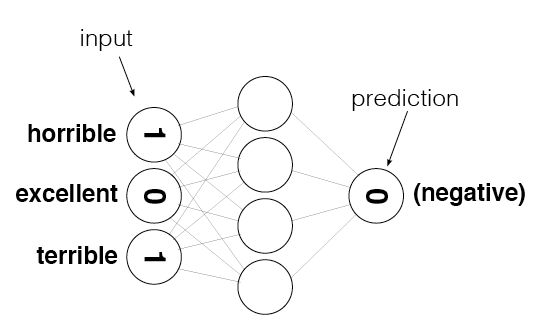

In [18]:
from IPython.display import Image
review = "This was a horrible, terrible movie."
Image(filename='sentiment_network.png')

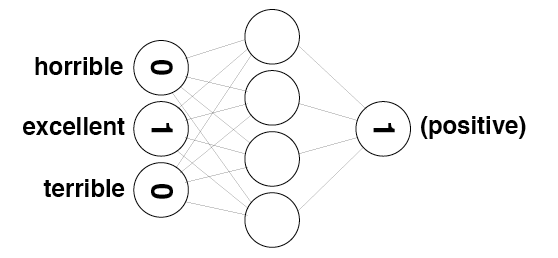

In [19]:
review = "The movie was exellent"
Image(filename='sentiment_network_pos.png')

# Project 2: Creating the Input/Output Data
**TODO**: Create a [set](https://docs.python.org/3/tutorial/datastructures.html#sets) named `vocab` that contains every word in the vocabulary.

In [0]:
vocab = set(total_counts.keys())

In [21]:
 vocab_size = len(vocab)
 print(vocab_size)

74074


Take a look at thhe following image. it represents the layers of thhe neural netowkr you'll be building thhroughout this notebook. `layer_0` is the input layer, `layer_1` is a hidden layer, and `layer_2` is the output layer..

In [0]:
layer_0 = np.zeros((1, vocab_size))

In [23]:
layer_0.shape

(1, 74074)

`layer_0` contains one entry for every word in the vocabulary, as shown in the above image. We need to make sure we know the index of each word, so run the following cell to create a lookup table that stores the index of every word.

In [24]:
# Create a dictionary of words in the vocabulary mapped to index positions
# (to be used in layer_0)
word2index = {}
for i, word in enumerate(vocab):
  word2index[word] = i
  
# display the map of words to indices
word2index

{'': 0,
 'analysis': 1,
 'consideration': 2,
 'baz': 3,
 'barbarians': 4,
 'centres': 5,
 'batonzilla': 6,
 'jutta': 7,
 'fbl': 8,
 'gall': 9,
 'pomegranate': 10,
 'monkeybone': 11,
 'simplifies': 12,
 'zealnd': 13,
 'hennessy': 14,
 'newtypes': 15,
 'aging': 16,
 'perfection': 17,
 'schlitz': 18,
 'conveniently': 19,
 'london': 20,
 'outmoded': 21,
 'thuggies': 22,
 'kid': 23,
 'chal': 24,
 'affleck': 25,
 'ein': 26,
 'tutors': 27,
 'whaaaa': 28,
 'flows': 29,
 'yugonostalgic': 30,
 'spoken': 31,
 'wails': 32,
 'vanished': 33,
 'sixstar': 34,
 'izo': 35,
 'hoping': 36,
 'mdb': 37,
 'tentacled': 38,
 'slew': 39,
 'textured': 40,
 'bombshell': 41,
 'sombre': 42,
 'reportary': 43,
 'harebrained': 44,
 'buxomed': 45,
 'cassavets': 46,
 'boer': 47,
 'notre': 48,
 'quitting': 49,
 'gilles': 50,
 'whitewater': 51,
 'aphasia': 52,
 'cruellest': 53,
 'lindey': 54,
 'rin': 55,
 'kilograms': 56,
 'criticzed': 57,
 'improv': 58,
 'deficiency': 59,
 'resistor': 60,
 'heared': 61,
 'copola': 62,
 '

**TODO**: Complete the implementation of `update_input_layer`. It should count how many times each word is used in the given review, and the store those counts at the appropirate indices inside `layer_0`

In [0]:
def update_input_layer(review):
  """ Modify the global layser_0 to represent the vector form of review.
  The element at a given index of layer_0 should represent 
  how may times the given word occurs in the review.
  Args:
    review(string) - the string of the review
  Returns:
    None
  """
  
  global layer_0
  
  # clear out previous state, reset the layer to be all 0s
  layer_0 *= 0
  
  # count how many times each word is used in the given review and store the result
  for word in review.split(' '):
    layer_0[0][word2index[word]] += 1

In [26]:
update_input_layer(reviews[0])
layer_0

array([[18.,  0.,  0., ...,  0.,  0.,  0.]])

In [0]:
def get_target_for_label(label):
  if(label == 'POSITIVE'):
    return 1
  else:
    return 0

In [28]:
labels[0]


'POSITIVE'

In [29]:
get_target_for_label(labels[0])

1

# Project 3: Building a Neural Network
**TODO**: We've included the framework of a class called SentimentNetwork. Implement all of the items marked `TODO`in the code. These include doing the following: 
- Create a basic neural network much like the networks you've seen in earlier lessons and in Project 1, with an input layer, a hidden layer, and an output layer.
- Do **not** add a non-linearity in the hidden layer. That is, do not use an activation function when calculating the hidden layer outputs.
- Re-use the code from earlier in the notebook to create the training data (see `TODO`s in the code)
- Implement the `pre_process_data` function to create the vocabulary for our training data generating functions
- Ensure `train` trains over the entire corpus

In [0]:
import time
import sys
import numpy as np

In [0]:
import time
import sys
import numpy as np

# Encapsulate our neural network in a class
class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
        """Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        # Assign a seed to our random number generator to ensure we get
        # reproducable results during development 
        np.random.seed(1)

        # process the reviews and their associated labels so that everything
        # is ready for training
        self.pre_process_data(reviews, labels)
        
        # Build the network to have the number of hidden nodes and the learning rate that
        # were passed into this initializer. Make the same number of input nodes as
        # there are vocabulary words and create a single output node.
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        
        # populate review_vocab with all of the words in the given reviews
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)

        # Convert the vocabulary set to a list so we can access words via indices
        self.review_vocab = list(review_vocab)
        
        # populate label_vocab with all of the words in the given labels.
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        # Convert the label vocabulary set to a list so we can access labels via indices
        self.label_vocab = list(label_vocab)
        
        # Store the sizes of the review and label vocabularies.
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        # Create a dictionary of words in the vocabulary mapped to index positions
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        # Create a dictionary of labels mapped to index positions
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Store the learning rate
        self.learning_rate = learning_rate

        # Initialize weights

        # These are the weights between the input layer and the hidden layer.
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        # These are the weights between the hidden layer and the output layer.
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        # The input layer, a two-dimensional matrix with shape 1 x input_nodes
        self.layer_0 = np.zeros((1,input_nodes))
    
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        
        for word in review.split(" "):
            # NOTE: This if-check was not in the version of this method created in Project 2,
            #       and it appears in Andrew's Project 3 solution without explanation. 
            #       It simply ensures the word is actually a key in word2index before
            #       accessing it, which is important because accessing an invalid key
            #       with raise an exception in Python. This allows us to ignore unknown
            #       words encountered in new reviews.
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] += 1
                
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def train(self, training_reviews, training_labels):
        
        # make sure out we have a matching number of reviews and labels
        assert(len(training_reviews) == len(training_labels))
        
        # Keep track of correct predictions to display accuracy during training 
        correct_so_far = 0

        # Remember when we started for printing time statistics
        start = time.time()
        
        # loop through all the given reviews and run a forward and backward pass,
        # updating weights for every item
        for i in range(len(training_reviews)):
            
            # Get the next review and its correct label
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer
            self.update_input_layer(review)

            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
            
            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            # Keep track of correct predictions.
            if(layer_2 >= 0.5 and label == 'POSITIVE'):
                correct_so_far += 1
            elif(layer_2 < 0.5 and label == 'NEGATIVE'):
                correct_so_far += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the training process. 
            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        
        # keep track of how many correct predictions we make
        correct = 0

        # we'll time how many predictions per second we make
        start = time.time()

        # Loop through each of the given reviews and call run to predict
        # its label. 
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            # For debug purposes, print out our prediction accuracy and speed 
            # throughout the prediction process. 

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        # Run a forward pass through the network, like in the "train" function.
        
        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        # Return POSITIVE for values above greater-than-or-equal-to 0.5 in the output layer;
        # return NEGATIVE for other values
        if(layer_2[0] >= 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"


In [0]:
mlp = SentimentNetwork(reviews[:-1000], labels[:-1000], learning_rate=0.1)

In [33]:
mlp.test(reviews[-1000:], labels[-1000:])

Progress:99.9% Speed(reviews/sec):772.4 #Correct:500 #Tested:1000 Testing Accuracy:50.0%

In [34]:
mlp.train(reviews[:-1000], labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):264.6 #Correct:1251 #Trained:2501 Training Accuracy:50.0%
Progress:20.8% Speed(reviews/sec):263.4 #Correct:2501 #Trained:5001 Training Accuracy:50.0%
Progress:31.2% Speed(reviews/sec):264.3 #Correct:3751 #Trained:7501 Training Accuracy:50.0%
Progress:41.6% Speed(reviews/sec):264.6 #Correct:5001 #Trained:10001 Training Accuracy:50.0%
Progress:52.0% Speed(reviews/sec):265.7 #Correct:6251 #Trained:12501 Training Accuracy:50.0%
Progress:62.5% Speed(reviews/sec):266.3 #Correct:7501 #Trained:15001 Training Accuracy:50.0%
Progress:72.9% Speed(reviews/sec):267.2 #Correct:8751 #Trained:17501 Training Accuracy:50.0%
Progress:83.3% Speed(reviews/sec):267.7 #Correct:10001 #Trained:20001 Training Accuracy:50.0%
Progress:93.7% Speed(reviews/sec):268.1 #Correct:11251 #Trained:22501 Training Accuracy:50.0%
Progress:99.9% Speed(reviews/sec):268.1 #Correct:12000 #Trained:24000 Training Ac

In [35]:
mlp = SentimentNetwork(reviews[:-1000], labels[:-1000], learning_rate=0.001)
mlp.train(reviews[:-1000], labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):274.2 #Correct:1253 #Trained:2501 Training Accuracy:50.0%
Progress:20.8% Speed(reviews/sec):272.7 #Correct:2644 #Trained:5001 Training Accuracy:52.8%
Progress:31.2% Speed(reviews/sec):270.1 #Correct:4101 #Trained:7501 Training Accuracy:54.6%
Progress:41.6% Speed(reviews/sec):272.4 #Correct:5640 #Trained:10001 Training Accuracy:56.3%
Progress:52.0% Speed(reviews/sec):273.6 #Correct:7185 #Trained:12501 Training Accuracy:57.4%
Progress:62.5% Speed(reviews/sec):274.6 #Correct:8788 #Trained:15001 Training Accuracy:58.5%
Progress:72.9% Speed(reviews/sec):275.2 #Correct:10406 #Trained:17501 Training Accuracy:59.4%
Progress:83.3% Speed(reviews/sec):275.5 #Correct:12114 #Trained:20001 Training Accuracy:60.5%
Progress:93.7% Speed(reviews/sec):275.6 #Correct:13813 #Trained:22501 Training Accuracy:61.3%
Progress:99.9% Speed(reviews/sec):275.6 #Correct:14889 #Trained:24000 Training A

## End of Project 3

### Watch thhe next video to continue with Andrew's next lesson.

# Understanding Neural Noise

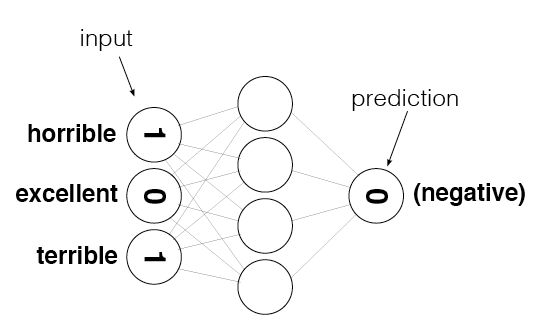

In [37]:
from IPython.display import Image
Image(filename='sentiment_network.png')

## Project 4: Reducing Noise in Our Input Data
**TODO**: Attempt to reduce the noise in the input date like Andrew did in the previous video. Specifically, do the following:
* Copy the `SentimentNetwork` class you created earlier into the following cell.
* Modify `update_input_layer` so it does not count how many times eachh word is used, but rathher just sotres whether or not a word was used.

The following code is the same as the previous project, with project-specific changes marked with "`New for Project4`"